# PW 1 - Markovian models  
Sampling of Markovian models.

The aim of this session is to program the Gibbs sampler algorithm and study it in the binary case. 

In this section we consider a binary Markov random field (taking values in $E=\{0,1\}$). 
The neighborhood is defined in 4-connexity and the potential of a clique of order 2 is defined by :
$U_c(0,1)=U_c(1,0)=+\beta$ and $U_c(1,1)=U_c(0,0)=0$ (the potential for singleton clique is 0).


In [1]:
import math
import random
import numpy as np
import platform
import tempfile
import os
import matplotlib.pyplot as plt
import imageio
from scipy import ndimage as ndi

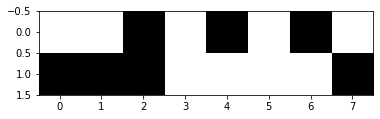

In [2]:
plt.set_cmap('gray')
 
sh=[2,8]

imaU=2-np.ceil(2*np.random.rand(*sh))
plt.imshow(imaU)

# Q1
For the Ising model defined above, and the imaU generated in the previous cell, give the formula of the global energy and give its value as a function of $\beta$ for imaU.



# A1 
For this image : 

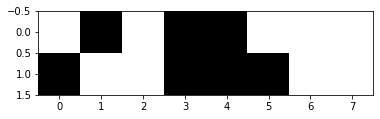

The global energy formulas is : $U(x) = \sum_{c \in C}V_{c}(x)$ 

With 
\begin{align}
V_{c=\{s,t\}}(x_{s},x_{t})= \left\{
\begin{array}{cl}
0 & \text{ if }  x_{s} = x_{t}\\
\beta & \text{else}.
\end{array}
\right.
\end{align}

Here we have : $U(x) = 10 \beta$

You can find here in red the $\beta$ in horizontal way and in green in vertical way, so $U(x) = h(x) + v(x) = 7\beta + 3\beta$

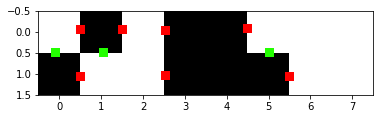


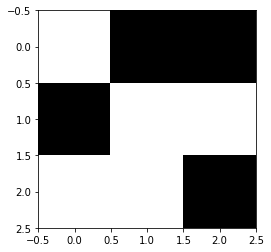

In [ ]:
sh=[3,3]

imaVois=2-np.ceil(2*np.random.rand(*sh))
plt.imshow(imaVois)

# Q2 

Write the general form of the local conditional probability in a pixel $s$. For the neighborhood configuration imaVois generated by the previous code cell, compute the 2 local conditional energies (for the value 0 and for the value 1 of the central pixel), then the local conditional probabilities (as a function of $\beta$). What is the most probable class ? (NB: do the calculation for an 8-neighborhood).


# A2

The local conditional probability is defined as : 
$P(X_{s}=x_{s} | V_{s}) = P(X_{s}=x_{s} | X_{t} = x_{t}, t \ne s) = \frac{1}{Z^s} \exp({-U_{s}(x_{s}, v_{s}}))$

For a binary image, we have binary state {0,1} so we are looking for : 

\begin{align}
\left\{
\begin{array}{cl}
P(X_{s}=0|V_{s})\\
P(X_{s}=1|V_{s})
\end{array}
\right.
\end{align}

In first step we can compute : 
\begin{align}
\left\{
\begin{array}{cl}
U(0|V_{s})=4\beta\\
U(1|V_{s})=4\beta
\end{array}
\right.
\end{align}

You can see on this picture in blue the $\beta$ for the state 0 and in pink for the state 1 :

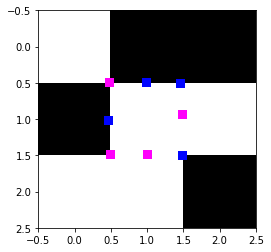

\begin{align}
\left\{
\begin{array}{cl}
P(X_{s}=0|V_{s}) = \frac{\exp{-4\beta}}{Z^s}\\
P(X_{s}=1|V_{s}) = \frac{\exp{-4\beta}}{Z^s}
\end{array}
\right.
\end{align}

With :
$Z^s = P(X_{s}=0|V_{s}) + P(X_{s}=1|V_{s}) = 1$ so $\frac{\exp{-4\beta}}{Z^s} + \frac{\exp{-4\beta}}{Z^s}=1 \Leftrightarrow Z^s = \exp{-4\beta} + \exp{-4\beta}$

As $U_{s}(0,V_{s}) = U_{s}(1,V_{s})$ we have $P(X_{s}=0|V_{s}) = P(X_{s}=1|V_{s})$ 

The white and the black color have the same probability for $s$

## Part 1

Programming the Gibbs sampler and drawing samples of Markovian models 



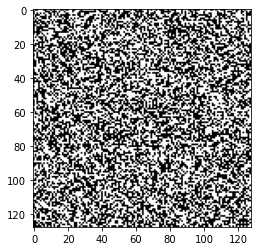

In [12]:
plt.set_cmap('gray')
 
sh=[128,128]

im_bin=2-np.ceil(2*np.random.rand(*sh))
plt.imshow(im_bin)

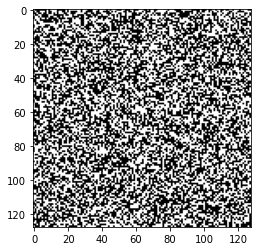

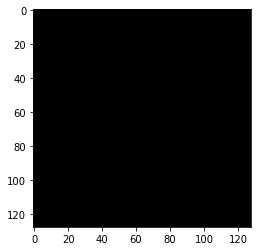

In [21]:
im_bin=2-np.ceil(2*np.random.rand(*sh))

def iter_icm(im_bin,beta_reg):

    i=0;
    j=0;

    for i in range(im_bin.shape[0]):
        for j in range(im_bin.shape[1]):
            # do not change these indices they allow access to neighboring pixels  
            i1=(i-1)%im_bin.shape[0]
            i2=(i+1)%im_bin.shape[0]
            j1=(j-1)%im_bin.shape[1]
            j2=(j+1)%im_bin.shape[1]

            # energy computation if the pixel is put in class 0
            Ureg0= (im_bin[i1,j] + im_bin[i,j2] + im_bin[i2,j] + im_bin[i,j1])*beta_reg # betaprim
            U0= Ureg0

            # energy computation if the pixel is put in class 1
            Ureg1= (4-(im_bin[i1,j] + im_bin[i,j2] + im_bin[i2,j] + im_bin[i,j1]))*beta_reg
            U1= Ureg1
 
            if (U0 < U1):
                im_bin[i,j]= 0
            else :
                im_bin[i,j]= 1
    return im_bin
# ICM algorithm to be implemented
#define the value of beta_reg to have a "good" regularization
beta_reg= 1

#initialise the binary image of the classes 

plt.imshow(im_bin)
plt.show()
# program a loop in which we call iter_icm 
# and display the class image as iterations are performed 
for n in range(100):
    im_bin = iter_icm(im_bin,beta_reg)
plt.imshow(im_bin, cmap='gray')
plt.show()

### Sampling function
Complete the following function which takes as input a binary image (which will be updated by Gibbs sampling) and the value of the regularization parameter.


Summary of the algorithm Gibbs sampler :
1. We go through the image, for each pixel: 
2. We want to know if it is more likely to be white or black according to its neighborhood: P(xs|Vs) according to the probability distribution P. There are several solutions: 
* a. We give the state with the maximum probability
* b. We calculate P(xs=0|Vs) and P(xs=1|Vs), we draw a random number between 0 and 1, we or it falls with respect to the threshold P(xs=0|Vs) (or 1-P(xs=1|Vs)), if it is lower => 0 otherwise 1

For Gibbs sampler we will use b.

3. We iterate many times

We obtain an image that follows the desired P distribution

In [3]:
def echan(im_bin,beta_reg):

    i=0;
    j=0;

    for i in range(im_bin.shape[0]):
        for j in range(im_bin.shape[1]):
          # do not change these indices 
          # they allow access to neighboring pixels  
          # i1,j and i2,j and i,j1 and i,j2
            i1=(i-1)%im_bin.shape[0]
            i2=(i+1)%im_bin.shape[0]
            j1=(j-1)%im_bin.shape[1]
            j2=(j+1)%im_bin.shape[1]

        # complete the calculation of energies and associated probabilities 
        # energy and non-normalized proba when the pixel is put in class 0
            Ureg0= (im_bin[i1,j] + im_bin[i,j2] + im_bin[i2,j] + im_bin[i,j1])*beta_reg
            p0=math.exp(-Ureg0);

        # energy and non-normalized proba when the pixel is put in class 1
            Ureg1= (4-(im_bin[i1,j] + im_bin[i,j2] + im_bin[i2,j] + im_bin[i,j1]))*beta_reg
            p1=math.exp(-Ureg1);
            
        # sampling according to the normalized probabilities. NB: the normalization is done here
            if (p0+p1!=0.):
                if(random.uniform(0,1)<p0/(p0+p1)):
                    im_bin[i,j]=0
                else :
                    im_bin[i,j]=1

    return im_bin

 
By varying the value of the regularization parameter and restarting the cell, observe. You can remove the visualization during sampling and increase the number of iterations

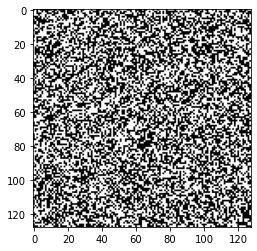

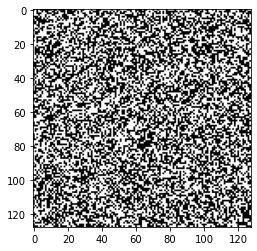

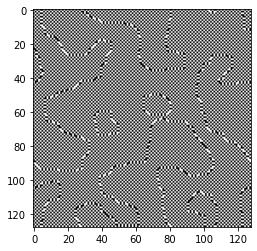

In [4]:
# random initialization of im_bin
plt.set_cmap('gray')
sh=[128,128]
im_bin=2-np.ceil(2*np.random.rand(*sh))
plt.imshow(im_bin)

beta_reg=-100

mafigure=plt.figure()
plt.imshow(im_bin);        
mafigure.canvas.draw()
plt.show()

for n in range(50):  
    echan(im_bin,beta_reg) 
    #plt.imshow(im_bin)      
    #mafigure.canvas.draw()
    #plt.show(block=False)
    

plt.figure()
plt.imshow(im_bin)
plt.show()

# Q3
Run the program several times. Do you still get the same image? Comment on this.

# A3
There is 3 run for $\beta$ = 20 with 10 iterations

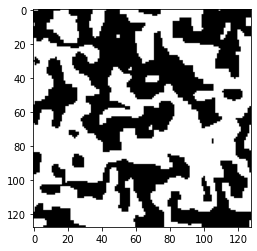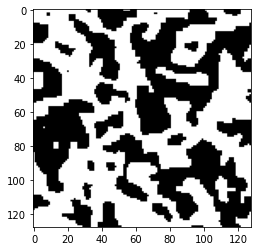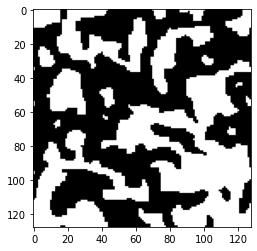


There is 3 run for $\beta$ = 20 with 50 iterations

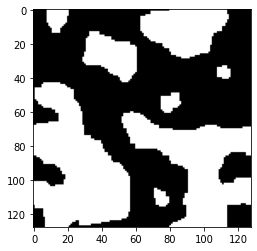
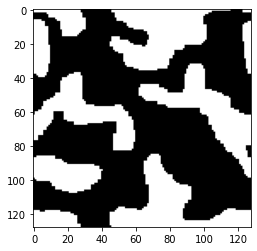
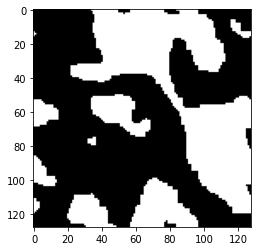

We can see that we have 3 differents results (for 10 iterations and for 50 iterations), indeed the image is which updated by Gibbs sampling that is a method using random by choosing a random value between 0 and 1 to verify if it's below or not of p0/(p0+p1). 

The more iterations there are the more the distribution tends to the desired distribution, here the gibbs distribution.

# Q4

Vary $\beta$ from 0.5 to 20. Comment on the results. 

# A4
With 10 iterations

$\beta = 0.5$ :

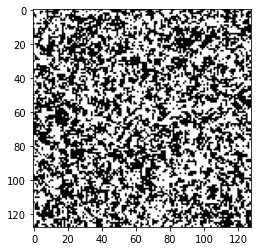

$\beta=1$ : 

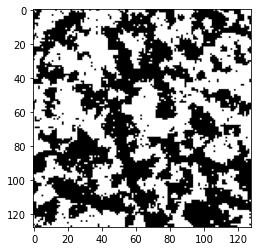

$\beta=10$ : 

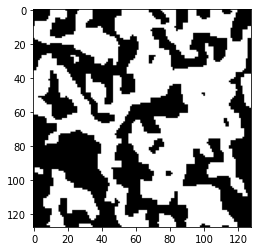

$\beta=20$ : 

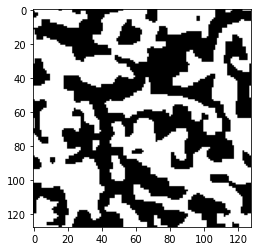

$\beta$ control the lenght of edges in the samples. We can see that when $\beta$ increase the image become more homogeneous, it's a regularization on edges, so when it's increase the lenght of edges descrease, they become more regular. The penalisation of the global energy will be more important for high $\beta$, so the model try to limit the lenght of the edges to limit the global energy.

# Q5 
Which image minimizes the overall energy for this model? 

# A5

An image completly black or white minimise the overall energy, indeed U(x) will be equals to 0 and the probability will be maximal. Indeed in pyhsics systems, stable systems are more probable than instable ones.

# Q6
Change 𝛽 and give it a negative value. Describe the result and justify it.

# A6

When β it a negative value, the algorithm will favorite dissimilar results, so we will tend to have a checkerboard and not anymore regular image. Here are some results with respectivly β=[-1, -10, -100] with 50 iterations : 

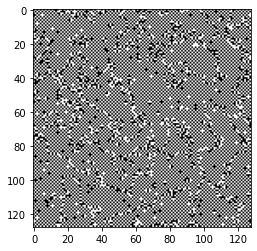

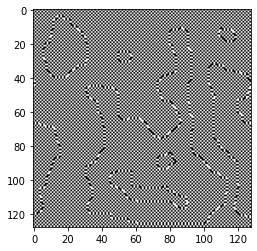

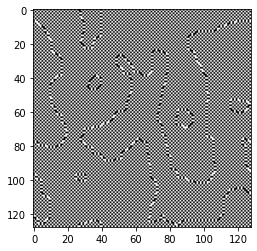

We can indeed see a checkerboard, that is the most dissimilar case, the more β is small the more perfect will be the checkerboard.
Negative β shows dissimilarity because the value in the exponential of the potential will be positive so when we will have a high potential (high dissimilarity) we will obtain a high probability. We can see that the more β is negatively high the more the edges will be regular.

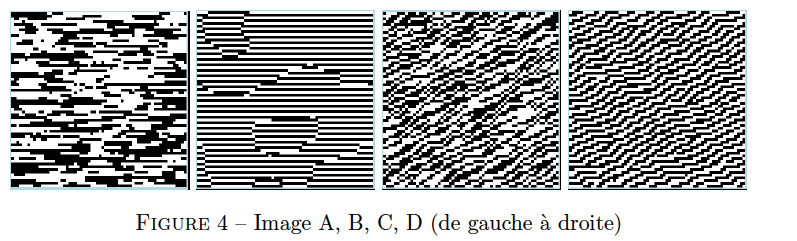

# Q7 
We now work in 8-neighborhood, but still with cliques of order 2 (non-isotropic this time). For each of the following images, propose the clique potentials that allow us to obtain these realizations. Initially all clique potentials are zero. 


* Image A : there is only one clique potential of order 2 which is -1.
* Image B : in addition to the previous one, there is a clique potential of order 2 which is 1. Indicate which one.
* Image C: in addition to the 2 previous ones, there is a clique potential of order 2 which is -1. Indicate which one.
* Image D: in addition to the 3 previous ones, there is a second order clique potential which is +1. Indicate which one.





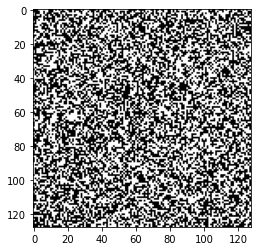

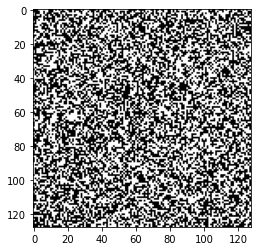

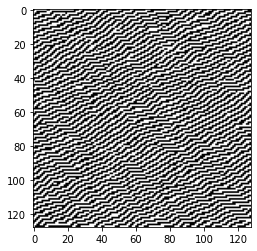

In [ ]:
def echan_test(im_bin,beta_reg):

    i=0;
    j=0;

    for i in range(im_bin.shape[0]):
        for j in range(im_bin.shape[1]):
          # do not change these indices 
          # they allow access to neighboring pixels  
          # i1,j and i2,j and i,j1 and i,j2
            i1=(i-1)%im_bin.shape[0]
            i2=(i+1)%im_bin.shape[0]
            j1=(j-1)%im_bin.shape[1]
            j2=(j+1)%im_bin.shape[1]

        # complete the calculation of energies and associated probabilities 
        # energy and non-normalized proba when the pixel is put in class 0
            Ureg0= (-1 if im_bin[i,j1]==0 else 0 + -1 if im_bin[i,j2]==0 else 0)*beta_reg # horiz
            Ureg0 += (1 if im_bin[i1,j]==0 else 0 + 1 if im_bin[i2,j]==0 else 0)*beta_reg  # vert
            Ureg0 += (-1 if im_bin[i2,j1]==0 else 0 + -1 if im_bin[i1,j2]==0 else 0)*beta_reg #/
            Ureg0 += (1 if im_bin[i1,j1]==0 else 0 + 1 if im_bin[i2,j2]==0 else 0)*beta_reg # \
            p0=math.exp(-Ureg0);

        # energy and non-normalized proba when the pixel is put in class 1
            Ureg1= (-1 if im_bin[i,j1]==1 else 0 + -1 if im_bin[i,j2]==1 else 0)*beta_reg 
            Ureg1+= (1 if im_bin[i1,j]==1 else 0 + 1 if im_bin[i2,j]==1 else 0)*beta_reg 
            Ureg1 += (-1 if im_bin[i2,j1]==1 else 0 + -1 if im_bin[i1,j2]==1 else 0)*beta_reg 
            Ureg1 += (1 if im_bin[i1,j1]==1 else 0 + 1 if im_bin[i2,j2]==1 else 0)*beta_reg
            p1=math.exp(-Ureg1);
            
        # sampling according to the normalized probabilities. NB: the normalization is done here
            if (p0+p1!=0.):
                if(random.uniform(0,1)<p0/(p0+p1)):
                    im_bin[i,j]=0
                else :
                    im_bin[i,j]=1

    return im_bin
    
# random initialization of im_bin
plt.set_cmap('gray')
sh=[128,128]
im_bin=2-np.ceil(2*np.random.rand(*sh))
plt.imshow(im_bin)

beta_reg=5

mafigure=plt.figure()
plt.imshow(im_bin);        
mafigure.canvas.draw()
plt.show()

for n in range(50):  
    echan_test(im_bin,beta_reg) 
    

plt.figure()
plt.imshow(im_bin)
plt.show()

# A7

For the image A we have only 1 clique so the global energy will be equal to the potential of the clique. For B we add a new clique and so forth untile D.

With some test of cliques i found that : 

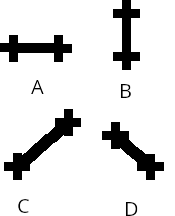

Here are my results : 

A with horizontal clique :

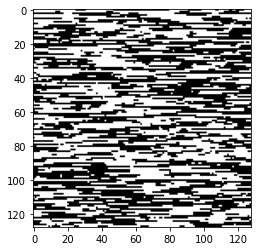

B with vertical clique :

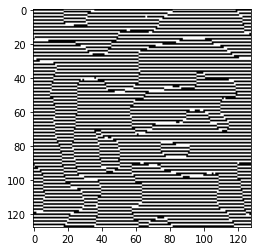

C with diagonal / clique : 

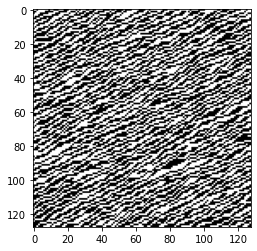

D with diagonal \ clique :

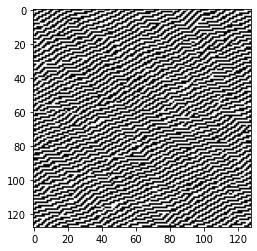

This result could be found by intuition :
* A : we have lines, so the model try to minimise an horizontal clique with potential -1
* B : we have the previous horizontal, and we can deduce that the second clique is vertical because we have more perfect lines by penalizing vertical clique by 1
* C : we have the 2 previous clique and we can see that the model try to minimise energy on the diagonal / axis with -1 potential for this clique

* D : we have the 3 previous clique and the last one the diagonal \ clique that try to minimize the energy by limiting this direction caused by 1 potential for this clique

# Q8

Modify your program to define an Ising model with a diagonal attractive potential only (the other potentials are zero). Comment on the result. 

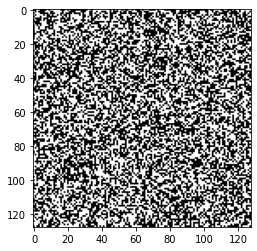

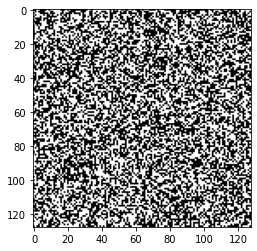

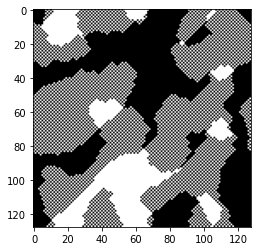

In [ ]:
def echan_test1(im_bin,beta_reg):

    i=0;
    j=0;

    for i in range(im_bin.shape[0]):
        for j in range(im_bin.shape[1]):
          # do not change these indices 
          # they allow access to neighboring pixels  
          # i1,j and i2,j and i,j1 and i,j2
            i1=(i-1)%im_bin.shape[0]
            i2=(i+1)%im_bin.shape[0]
            j1=(j-1)%im_bin.shape[1]
            j2=(j+1)%im_bin.shape[1]

        # complete the calculation of energies and associated probabilities 
        # energy and non-normalized proba when the pixel is put in class 0
            Ureg0= (im_bin[i1,j1] + im_bin[i2,j2] + im_bin[i1,j2] + im_bin[i2,j1])*beta_reg
            p0=math.exp(-Ureg0);

        # energy and non-normalized proba when the pixel is put in class 1
            Ureg1= (4-(im_bin[i1,j1] + im_bin[i2,j2] + im_bin[i1,j2] + im_bin[i2,j1]))*beta_reg
            p1=math.exp(-Ureg1);
            
        # sampling according to the normalized probabilities. NB: the normalization is done here
            if (p0+p1!=0.):
                if(random.uniform(0,1)<p0/(p0+p1)):
                    im_bin[i,j]=0
                else :
                    im_bin[i,j]=1

    return im_bin
    
# random initialization of im_bin
plt.set_cmap('gray')
sh=[128,128]
im_bin=2-np.ceil(2*np.random.rand(*sh))
plt.imshow(im_bin)

beta_reg=20

mafigure=plt.figure()
plt.imshow(im_bin);        
mafigure.canvas.draw()
plt.show()

for n in range(50):  
    echan_test1(im_bin,beta_reg) 
    

plt.figure()
plt.imshow(im_bin)
plt.show()

# A8

Ising model with a diagonal attractive potential only give the result for 

β=1 : 

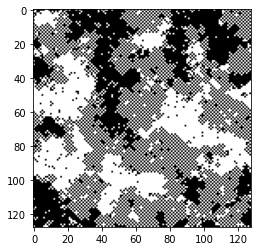

β=20 : 

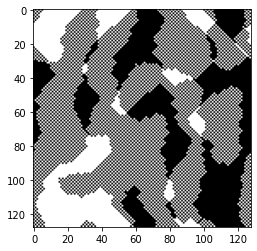

β=100 :

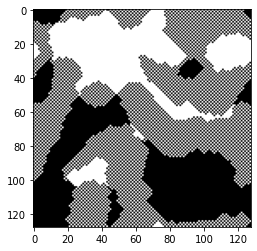 

β = -100 :

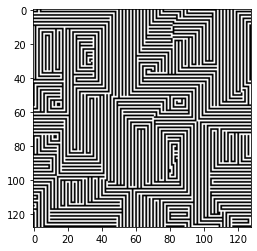

We can see very dissimilar region (checkerboard) and very homogeneous region for positive β. We can see these 2 types of regions because both allow to minimize the energy on the diagonals. Indeed, the homogeneous regions give no penalty. The checkerboard regions do not penalize the energy either because the checkerboard allows to create diagonal lines without changes.

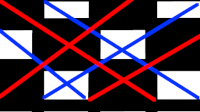

And for negative β we can see the inverse behaviour, where diagonals are avoided. We obtain dissimilar patterns on the both diagonals with horizontal and vertical lines. 